# Variational Inference

Given observed data $\mathbf{x}$ and latent variables $\mathbf{z}$ ($\mathbf{z}$ can be some model parameter), we are interested in approximating the posterior $p(\mathbf{z}|\mathbf{x})$ using a surrogate function $q(\mathbf{z})$ that is almost as good. Assume $\mathbf{z} \sim p(\mathbf{z})$ is the prior. 
 
**Aim**: minimize the KL-divergence $KL[q(\mathbf{z}) || p(\mathbf{z}|\mathbf{x})] = E_{q}[\log\frac{q(\mathbf{z})}{p(\mathbf{z}|\mathbf{x})}]$

Since we don't know the posterior, derive

$
\begin{align*}
KL[q(\mathbf{z}) || p(\mathbf{z}|\mathbf{x})] &= E_{q}[\log\frac{q(\mathbf{z})}{p(\mathbf{z}|\mathbf{x})}] = E_{q}[\log\frac{q(\mathbf{z})p(\mathbf{x})}{p(\mathbf{z},\mathbf{x})}] \\
&= \underbrace{E_{q}[\log\frac{q(\mathbf{z})}{p(\mathbf{z},\mathbf{x})}]}_{-ELBO} + \underbrace{\log p(\mathbf{x})}_{\text{evidence (fixed)}}
\end{align*}
$

Then we have $\min_{q} KL = \max_q ELBO$

Note that since $KL[q(\mathbf{z}) || p(\mathbf{z}|\mathbf{x})] \ge 0$, 
we have $\log p(\mathbf{x}) \ge ELBO = E_{q}[\log\frac{q(\mathbf{z})}{p(\mathbf{z},\mathbf{x})}]$, which is the same as the derivation from Jenson's inequality. Or, from the reverse approach, we can get KL-divergence non-negative from the inequality. 

## References of Variational Inference

* https://arxiv.org/abs/1601.00670

* https://www.cs.princeton.edu/courses/archive/fall11/cos597C/lectures/variational-inference-i.pdf

* https://www.youtube.com/watch?v=HxQ94L8n0vU&t=474s


# Report on previous comments

This section summarizes some key points from the comments from Professor Scott Schwartz about variational inference https://github.com/pointOfive/Haining-Tan/blob/main/MADE_comments.ipynb

## Set up

Model: A simple linear regression $y \sim N(\beta_0 + \beta_1x, \sigma^2)$

Model parameter: ${\theta} = (\beta_0, \beta_1) \sim p(\theta)$ prior

Variational inference on the model parameter:

$
\begin{align*}
\underbrace{\log p(y)}_{\text{Fixed marginal}} = E_q[\log p(y|\theta)] + \underbrace{E_q [\log\frac{q(\theta)}{p(\theta|y)}]}_{KL[q || p(\theta|y)]} - \underbrace{E_q[\log \frac{q(\theta)}{p(\theta)}]}_{KL[q || p(\theta)]}
\end{align*}
$

where $q(\theta)$ is the surrogate posterior used to approximate the true posterior $p(\theta|y)$

I can see the trade-off between the three terms, but I am not sure about the second point. I think you mean the correction between the posterior and the prior, but I did not get the equation here. 

>2. a correction factor for wrongly integrating over $q(\theta) \approx p(\theta|y) \not = p(\theta)$
  - since $\log p(y) = E_{p(\theta)}[\log p(y|\theta)] \not =  E_{p(\theta|y)}[\log p(y|\theta)].$

## Implementation of DenseVariational Layer

DenseVariational Layer in TFP approximates the posteror by minimizing the KL-divergence based on the variational inference equation above:

$$KL[q|| p(\theta|y)] = \log p(y) + E_q[\log \frac{q(\theta)}{p(\theta)}] - E_q[\log p(y|\theta)]$$

where the objective is $\min_q E_q[\log \frac{q(\theta)}{p(\theta)}] - E_q[\log p(y|\theta)]$

* In my understanding, after approximating the posterior distribution for the model parameter $\theta = (\beta_0, \beta_1)$, DenseVariational Layer draws and returns a distribution $N(\hat\beta_0 + \hat\beta_1x, \sigma^2)$ from the posterior of $\beta_0, \beta_1$

* TODO: loss calculation, really struggling here... Not quite see your point addressing the model.losses... 

* kl-weight should be averaged by the batch size since the kl-divergence is calculated by batch. 

# Gaussian Process

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfk = tfp.psd_kernels

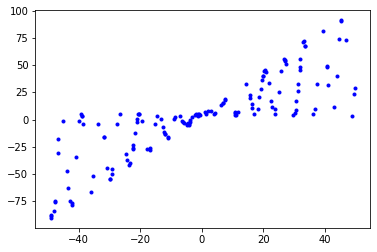

In [3]:
k = 1
b = 5
x_min = -50
x_max = 50

n = 150

def aleatoric(x): # variablity function for a particular x
  r = (x - x_min) / (x_max - x_min)
  return 2 * r

def generate_data(n):
  x = (x_max - x_min) * np.random.rand(n) + x_min 
  noise = np.random.randn(n) * aleatoric(x)
  y = (k * x * (1 + np.sin(x)) + b) + noise   # add some non-linearity and noise
  x = x[..., np.newaxis] # convert to N * 1 matrix
  return x, y

x_train, y_train = generate_data(n)
x_test, y_test = generate_data(n)

plt.figure()
plt.plot(x_train, y_train, "b.")

TODO: will finish soon 